## Adjective analysis

Created in 13/03/2019

This notebook describes visual analytics methods to organise/classify the adjectives identified through bigrams and trigrams analyses.

In [1]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
from nltk import TrigramCollocationFinder,BigramCollocationFinder,FreqDist
import sklearn.manifold
import sklearn.decomposition
from matplotlib import pyplot
import altair as alt

In [4]:
data = pd.read_pickle("WECdf.pkl")
model = KeyedVectors.load_word2vec_format("w2v_synant.txt")

In [6]:
sents = data['tokenized'].tolist()

In [7]:
modelwec = Word2Vec(sents, min_count=1, workers=4)

The following list of adjectives are manually written here:

In [270]:
adjs2 = ['small', 'strong', 'several', 'big',  'little', 'broad', 'large', 'heavy', 'few', 'slight', 'minimal', 'moderate', 'vast', 'many', 'weak']
#adjs2 = ['particular', 'distinctive', 'identifiable', 'diffuse', 'discernible', 'definite', 'definitive', 'clear', 'real', 'unconnected', 'noticeable', 'unrelated', 'readable', 'general', 'possible', 'obvious', 'vague', 'present', 'distinct', 'independent']
#adjs2= ['greatly', 'well', 'less', 'strong', 'many', 'largely', 'roughly', 'completely', 'small', 'slight', 'weak', 'quite', 'concentrated', 'condensed', 'little', 'weighted', 'slightly', 'moderately', 'heavy', 'vast', 'more', 'mostly', 'large', 'big', 'moderate', 'few', 'strongly', 'pretty', 'packed', 'minimal', 'generally', 'most', 'several', 'broad', 'very', 'somewhat', 'fairly']
#adjs2=['big','large','strong','many','moderate','more','less','slight','minimal','small','weak','little']
adjs_all = ['weak',
 'condensed',
 'concentrated',
 'less',
 'packed',
 'many',
 'minimal',
 'vast',
 'slight',
 'several',
 'little',
 'small',
 'few',
 'broad',
 'weighted',
 'moderate',
 'more',
 'strong',
 'big',
 'heavy',
 'large']
adjs_reduced = [ 'condensed',
 'weak',
 'packed',
 'minimal',
 'few',
 'little',
 'concentrated',
 'several',
 'less',
 'strong',
 'broad',
 'moderate',
 'small',
 'large',
 'slight']


In [271]:
adjs = [w for w in adjs_reduced if w in model.vocab]
vocabs = [model.get_vector(w) for w in adjs if w in model.vocab]

t-SNE parameters require heavy tweaking:

In [133]:
#tsne = sklearn.manifold.TSNE(n_components = 2 , random_state = 0,
 #                            learning_rate=300, perplexity=3.9, n_iter=600, early_exaggeration=159)
tsne = sklearn.manifold.TSNE(n_components = 2 , 
                             learning_rate=3, perplexity=2.2, n_iter=300, early_exaggeration=75)
#tsne = sklearn.manifold.TSNE(n_components = 2 , random_state = 3,
#                             learning_rate=370, perplexity=2.7 , n_iter=600, early_exaggeration=190)
#all_vector_matrix = vocabs
all_vector_matrix_2d = tsne.fit_transform(vocabs)
#pyplot.figure(figsize=(8, 8))
#%pyplot.scatter(all_vector_matrix_2d[:, 0], all_vector_matrix_2d[:, 1])
words = list(adjs)
#for i, word in enumerate(words):
#    pyplot.annotate(word, xy=(all_vector_matrix_2d[i, 0], all_vector_matrix_2d[i, 1]))
#pyplot.show()

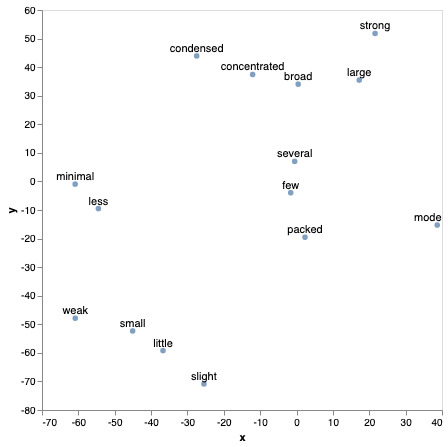

In [275]:
tsne = sklearn.manifold.TSNE(n_components = 2 , 
                             learning_rate=6, perplexity=2.3, n_iter=500, early_exaggeration=120)
all_vector_matrix_2d = tsne.fit_transform(vocabs)
words = list(adjs)
splot = alt.Chart(pd.merge(pd.DataFrame(all_vector_matrix_2d,columns=['x','y']),pd.Series(words,name='words'),left_index=True,right_index=True)
         ).mark_circle().encode(
        x='x:Q',
        y='y:Q').properties(height=400,width=400)

text = splot.mark_text(
       align='center',
       baseline='bottom',
    dy=-2
).encode(
    text='words'
).interactive()
(splot+text).configure_axis(
    grid=False
)

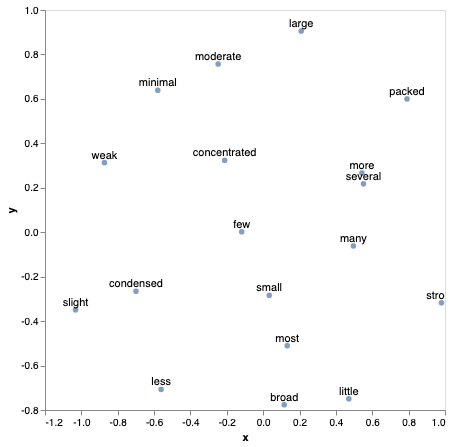

In [233]:
pca = sklearn.manifold.MDS(n_components=2, eps=1e-1)
proj = pca.fit_transform(vocabs)
words = list(adjs)
splot = alt.Chart(pd.merge(pd.DataFrame(proj,columns=['x','y']),pd.Series(words,name='words'),left_index=True,right_index=True)
         ).mark_circle().encode(
        x='x:Q',
        y='y:Q').properties(height=400,width=400)

text = splot.mark_text(
       align='center',
       baseline='bottom',
    dy=-2
).encode(
    text='words'
).interactive()
(splot+text).configure_axis(
    grid=False
)